In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read csv file
data = pd.read_csv('At risk customers data.csv')

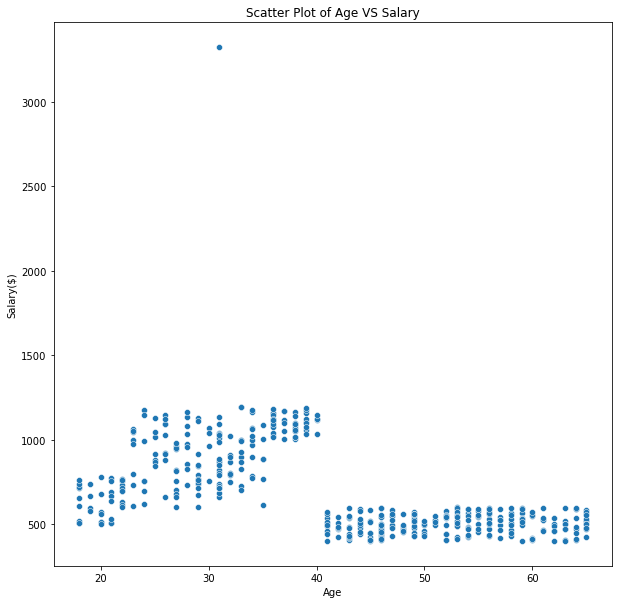

In [3]:
## Visualize the clusters
plt.figure(figsize = (10,10))
sns.scatterplot(x='Age', y='Salary',data=data)
plt.title('Scatter Plot of Age VS Salary')
plt.xlabel('Age')
plt.ylabel('Salary($)')
plt.show()

In [4]:
# Select columns we are interested in
data_features = data.iloc[:,[17, 25]]
data_features.head()

,Age,Salary
0,58,569
1,40,1119
2,49,548
3,43,593
4,60,419


In [4]:
# Select number of clusters as 2
model_kmeans = KMeans(n_clusters=2, init='k-means++',random_state=42)

#Fit model and create cluster column
y_means = model_kmeans.fit_predict(data_features)
data["cluster"] = y_means

NameError: name 'data_features' is not defined

In [6]:
data['cluster'].value_counts()

cluster
0    312
1    138
2      1
Name: count, dtype: int64

In [7]:
pd.crosstab(data['cluster'],data['Gender']) 

Gender,female,male
cluster,,
0,160,152
1,80,58
2,0,1


In [8]:
data.groupby('cluster')[['Quantity', 'Unit price', 'Age', 'Salary']].mean()

,Quantity,Unit price,Age,Salary
cluster,,,,
0,1.009615,498.314103,46.221154,540.602564
1,1.014493,509.726449,32.137681,1013.855072
2,2.000000,657.000000,31.000000,3325.000000


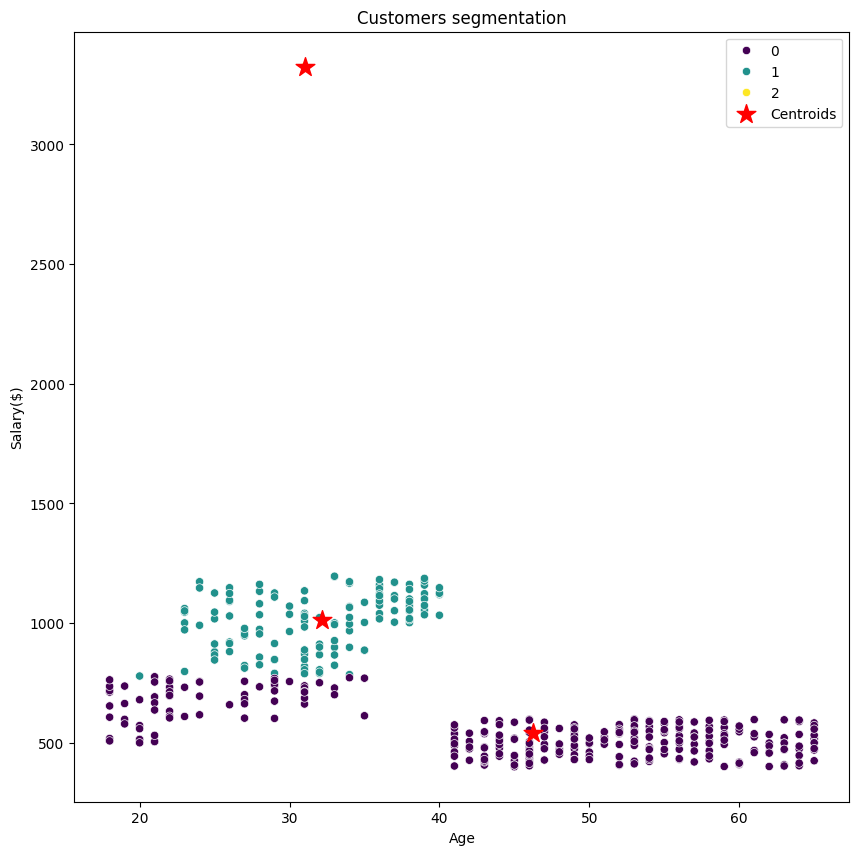

In [9]:
## Visualize the clusters
plt.figure(figsize = (10,10))
sns.scatterplot(x='Age', y='Salary', hue='cluster', data=data, palette='viridis')
plt.scatter(model_kmeans.cluster_centers_[:,0],model_kmeans.cluster_centers_[:,1], s = 200, c = 'red',marker='*', label = 'Centroids')
plt.title('Customers segmentation')
plt.xlabel('Age')
plt.ylabel('Salary($)')
plt.legend()
plt.show()

# An elbow plot shows at what value of k, the distance between the mean of a cluster and the other data points in the cluster is at its lowest.

##### Two values are of importance here — distortion and inertia. Distortion is the average of the euclidean squared distance from the centroid of the respective clusters. Inertia is the sum of squared distances of samples to their closest cluster centre.

C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default valu

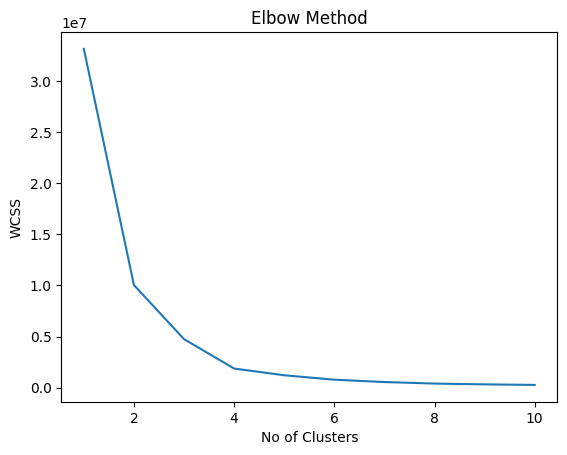

In [10]:
wcss= [] #the sum of squared distance between each point and the centroid in a cluster
for i in range(1,11):
    k_means = KMeans(n_clusters=i, init="k-means++")
    k_means.fit(data_features)
    wcss.append(k_means.inertia_)

plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default valu

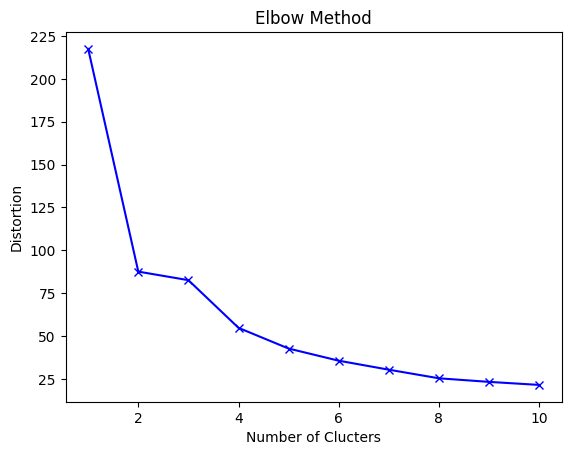

In [11]:
from scipy.spatial.distance import cdist # to calculate 
#k means determine k
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data_features)
    kmeanModel.fit(data_features)
    distortions.append(sum(np.min(cdist(data_features, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data_features.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clucters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

## Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

##### Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [12]:
silhouette_score(data_features,y_means)

0.7204127287627056

# Cluster our data into 3 groups

In [13]:
# Select number of clusters as 2
model_kmeans_2 = KMeans(n_clusters=2, init='k-means++',random_state=42)
#Fit model and create cluster column
y_means_2 = model_kmeans_2.fit_predict(data_features)
data["cluster_2"] = y_means_2

silhouette_score(data_features,y_means_2)

C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.7193838766285751

In [14]:
data.cluster_2.unique()

array([0, 1])

In [15]:
pd.crosstab(data['cluster_2'],data['Gender']) 

Gender,female,male
cluster_2,,
0,163,154
1,77,57


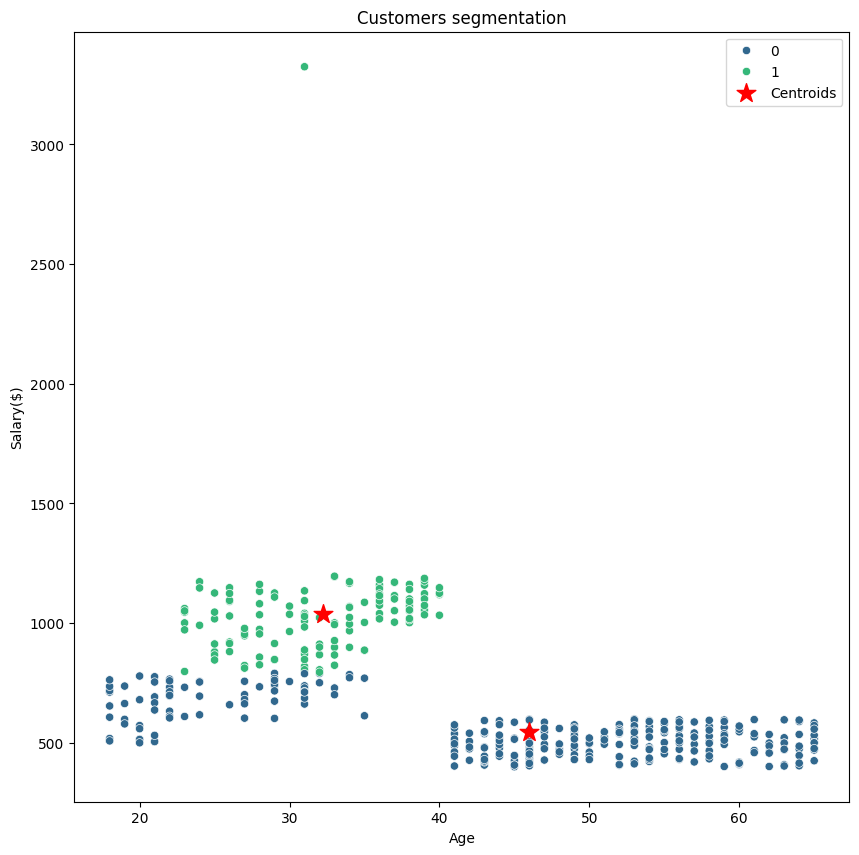

In [16]:
## Visualize the clusters
plt.figure(figsize = (10,10))
sns.scatterplot(x='Age', y='Salary', hue='cluster_2', data=data, palette='viridis')
plt.scatter(model_kmeans_2.cluster_centers_[:,0],model_kmeans_2.cluster_centers_[:,1], s = 200, c = 'red',marker='*', label = 'Centroids')
plt.title('Customers segmentation')
plt.xlabel('Age')
plt.ylabel('Salary($)')
plt.legend()
plt.show()
